# Project 02 - Image Processing

## Student Information

- Full name: Trương Thuận Kiệt
- Student ID: 22127224
- Class: 22CLC01

## Required Libraries

In [7]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL as pil

## Function Definitions

In [8]:

def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''
    img = pil.Image.open(img_path)
    return np.array(img)
    # YOUR CODE HERE


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''
    plt.imshow(img)
    # YOUR CODE HERE


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''
    # img = pil.Image.fromarray(img)
    img.save(img_path)
    # YOUR CODE HERE


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

def change_brightness(img, alpha):
    '''
    Change brightness of image

    Parameters
    ----------
    img : <your type>
        Image
    alpha : float
        Alpha value

    Returns
    -------
        Image
    '''
    array_alpha = np.array([alpha], dtype = np.float32)
    print(array_alpha)
    img = np.clip(img + array_alpha, 0, 255)
    img = img.astype(np.uint8)
    # print (img)
    return pil.Image.fromarray(img)


def adjust_contrast(img, alpha):
    '''
    Adjust contrast of image

    Parameters
    ----------
    img : <your type>
        Image
    alpha : float
        Alpha value

    Returns
    -------
        Image
    '''
    img = img.astype(np.float32)

    alpha = np.clip(float(alpha), -255, 255)
    factor = (259 * (alpha + 255)) / (255 * (259 - alpha))
    
    img = 128 + factor * (img - 128)
    img = np.clip(img, 0, 255)
    
    img = img.astype(np.uint8)
    return pil.Image.fromarray(img)

def flip_image(img, direction):
    '''
    Flip image

    Parameters
    ----------
    img : <your type>
        Image
    direction : str
        Direction of flip

    Returns
    -------
        Image
    '''
    if direction == 'horizontal':
        img = np.fliplr(img)
        # print("Horizontal: ", np.array(img))
    elif direction == 'vertical':
        img = np.flipud(img)
        # print("Vertical: ", np.array(img))
    return pil.Image.fromarray(img)

def grayscale_image(img):
    '''
    Convert image to grayscale

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''
    # Slice the image to only take the first 3 channels (RGB)
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    img = img.astype(np.uint8)
    # Turn this back to RGB
    img = np.stack((img, img, img), axis=-1)
    return pil.Image.fromarray(img)


def sepia_image(img):
    '''
    Convert image to sepia

    Parameters
    ----------
    img : numpy.ndarray
        Image array

    Returns
    -------
    numpy.ndarray
        Sepia toned image array
    '''
    if len(img.shape) == 2 or img.shape[2] != 3:
        raise ValueError("Input image must be an RGB image")
    
    # Convert image to float for precision before applying the sepia filter
    img = img.astype(float)
    
    # Define the sepia filter matrix
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    
    # Apply the sepia filter to each pixel
    sepia_img = img @ sepia_filter.T
    
    # Clip the values to be in the valid range [0, 255]
    sepia_img = np.clip(sepia_img, 0, 255)
    
    # Convert back to uint8
    sepia_img = sepia_img.astype(np.uint8)
    
    return Image.fromarray(sepia_img)

def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Calculate the dimensions of the output
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Create a strided view of the image
    strided_image = np.lib.stride_tricks.as_strided(
        image,
        shape=(output_height, output_width, kernel_height, kernel_width),
        strides=image.strides + image.strides
    )

    # Perform the convolution
    output = np.einsum('ijkl,kl->ij', strided_image, kernel)
    
    return output


def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(
            - ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)
        ), (size, size)
    )
    return kernel / np.sum(kernel)

def blur_image(img, size, sigma):
    """
    Blur image

    Parameters
    ----------
    img : numpy array
        Image

    Returns
    -------
        Image
    """
    kernel = gaussian_kernel(size, sigma)
    blurred_img = np.zeros_like(img)

    # Apply convolution to each channel
    blurred_img = np.dstack((convolve2d(img[:,:,0], kernel), convolve2d(img[:,:,1], kernel), convolve2d(img[:,:,2], kernel)))
    # print("blurred_img", blurred_img)
    return Image.fromarray(blurred_img.astype(np.uint8))

def sharpen_image(img):
    '''
    Sharpen image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    
    sharpened_img = np.zeros_like(img)
    sharpened_img = np.dstack((convolve2d(img[:,:,0], kernel), convolve2d(img[:,:,1], kernel), convolve2d(img[:,:,2], kernel)))

        
    sharpened_img = np.clip(sharpened_img, 0, 255)
    # print("sharpened_img", sharpened_img)
    sharpened_img = sharpened_img.astype(np.uint8)
    return Image.fromarray(sharpened_img)


def center_crop(img, new_height, new_width):
    '''
    Crop image from center

    Parameters
    ----------
    img : <your type>
        Image
    new_height : int
        Height of new image
    new_width : int
        Width of new image

    Returns
    -------
        Image
    '''
    height, width = img.shape[:2]
    top = (height - new_height) // 2
    left = (width - new_width) // 2
    bottom = top + new_height
    right = left + new_width
    return Image.fromarray(img[top:bottom, left:right])

def circle_crop(img):
    '''
    Crop image to circle and place it on a black background

    Parameters
    ----------
    img : numpy.ndarray
        Image
    height : int
        Height of the output image
    width : int
        Width of the output image

    Returns
    -------
    numpy.ndarray
        Image cropped to a circle with a black background
    '''
    # Initialize height and width, center and radius of the circle
    h, w = img.shape[:2]
    center = (int(w / 2), int(h / 2))
    radius = min(center[0], center[1], w - center[0], h - center[1])

    # Create a circular mask
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

    circular_mask = dist_from_center <= radius

    # Apply the mask to the image and background it with black
    img = img * circular_mask[:, :, np.newaxis]

    return Image.fromarray(img)

def create_ellipse_mask(img):
    '''
    Create ellipse mask

    Parameters
    ----------
    img : numpy.ndarray
        Image

    Returns
    -------
    numpy.ndarray
        Ellipse mask
    '''
    # Initialize height, width, center, a, b
    h, w = img.shape[:2]
    d = min(h,w)/2
    
    a = d*1.26
    b = a/2
    center = (int(w / 2), int(h / 2))
    # print(a,b)
    # print(center)
    # The ellipse equation is (x-center[0])**2/a**2 + (y-center[1])**2/b**2 = 1
    # We will create 2 masks for the 2 parts of the ellipse
    
    # Y, X are the coordinates of the image
    Y, X = np.ogrid[:h, :w]
    
    sin_45 = np.sin(np.pi/4)
    cos_45 = np.cos(np.pi/4)
    
    # Calculate the numerator and denominator of the ellipse equation
    numerator_1 = ((X-center[0])*cos_45 + (Y-center[1])*sin_45)**2
    numerator_2 = ((X-center[0])*sin_45 - (Y-center[1])*cos_45)**2
    # print("numerators", numerator_1, numerator_2)
    denominator_1 = a**2
    denominator_2 = b**2
    
    # Check if the point is inside the ellipse (mask1 and mask2 are boolean masks)
    mask1 = numerator_1/denominator_1 + numerator_2/denominator_2 <= 1
    mask2 = numerator_2/denominator_1 + numerator_1/denominator_2  <= 1
    
    # Combine the 2 masks
    mask = mask1 + mask2
    
    # Apply the mask to the image and background it with black
    img = img * mask[:, :, np.newaxis]
    return Image.fromarray(img)



## Zoom in/ out

In [9]:
def zoom_image(image, zoom_factor, zoom_in=True):
    '''
    Zoom image
    
    Parameters
    ----------
    image : numpy.ndarray
        Image
        
    Returns
    -------
    numpy.ndarray
        Zoomed image
    '''
    
    height, width = image.shape[:2]

    if zoom_in:
        # Zoom In
        new_width = int(width * zoom_factor)
        new_height = int(height * zoom_factor)
    else:
        # Zoom Out
        new_width = int(width / zoom_factor)
        new_height = int(height / zoom_factor)

    # Resize the image using numpy
    zoomed_image = np.array(
        [[image[int(i * height / new_height), int(j * width / new_width)]
          for j in range(new_width)] for i in range(new_height)]
    )

    return Image.fromarray(zoomed_image)


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [10]:
Test1 = 'Lenna.png'
Test2 = 'test1.jpg'
Test3 = 'test2.jpg'

## Main FUNCTION

In [11]:

def main():
    img_path = input("Enter image path: ")
    # img_path = Test3
    # img_path = 'test2.jpg'
    img = read_img(img_path)
    # Allows the user to select the image processing function (from 1 to 7, for function 4 allows choosing between horizontal or vertical). Choice 0 allows all functions to be executed with the beginning of the file name corresponding to each function.
    print("Choose a function: ")
    print("0. All functions")
    print("1. Change brightness")
    print("2. Adjust contrast")
    print("3. Flip image")
    print("4. Grayscale image")
    print("5. Sepia image")
    print("6. Blur image")
    print("7. Sharpen image")
    print("8. Center crop")
    print("9. Circle crop")
    print("10. Create ellipse mask")
    print("11. Zoom at")
    img_name = img_path.split('.')[0]
    choice = int(input("Choose a function: "))
    if choice == 1:
        brightness = int(input("Enter brightness value: "))
        img = change_brightness(img, brightness)
        show_img(img)
        save_img(img, img_name + '_change_brightness.png')
    elif choice == 2:
        contrast = int(input("Enter contrast value: "))
        img = adjust_contrast(img, contrast)
        show_img(img)
        save_img(img, img_name + '_adjust_contrast.png')
    elif choice == 3:
        direction = input("Choose direction (horizontal/vertical): ")
        img = flip_image(img, direction)
        show_img(img)
        save_img(img, img_name + "_" + direction + '_flip_image.png')
    elif choice == 4:
        img = grayscale_image(img)
        show_img(img)
        save_img(img, img_name + '_grayscale_image.png')
    elif choice == 5:
        img = sepia_image(img)
        show_img(img)
        save_img(img, img_name + '_sepia_image.png')
    elif choice == 6:
        img = blur_image(img, 5, 1)
        show_img(img)
        save_img(img, img_name + '_blur_image.png')
    elif choice == 7:
        img = sharpen_image(img)
        show_img(img)
        save_img(img, img_name + '_sharpen_image.png')
    elif choice == 8:
        height = int(input("Enter height: "))
        width = int(input("Enter width: "))
        img = center_crop(img, height, width)
        show_img(img)
        save_img(img, img_name + '_center_crop.png')
    elif choice == 9:
        img = circle_crop(img)
        show_img(img)
        save_img(img, img_name + '_circle_crop.png')
    elif choice == 10:
        img = create_ellipse_mask(img)
        show_img(img)
        save_img(img, img_name + '_ellipse_mask.png')
    elif choice == 11:
        zoom = input("Zoom in or out (in/out): ")
        if zoom == 'in':
            img = zoom_image(img, 2, True)
        else:
            img = zoom_image(img, 2, False)
        show_img(img)
        save_img(img, img_name + '_zoom_' + zoom + '.png') 
    else :
        brightness = int(input("Enter brightness value: "))
        img1 = change_brightness(img, brightness)
        print("Image after change brightness: ")
        show_img(img1)
        save_img(img1, img_name + '_change_brightness.png')
        
        constrast = int(input("Enter contrast value: "))
        img2 = adjust_contrast(img, constrast)
        print("Image after adjust contrast: ")
        show_img(img2)
        save_img(img2, img_name + '_adjust_contrast.png')
        
        direction = input("Choose direction (horizontal/vertical): ")
        img3 = flip_image(img, direction)
        print("Image after flip: ")
        show_img(img3)
        save_img(img3, img_name + '_' + direction + '_flip_image.png')
        
        img4 = grayscale_image(img)
        print("Image after grayscale: ")
        show_img(img4)
        save_img(img4, img_name + '_grayscale_image.png')
        
        img5 = sepia_image(img)
        print("Image after sepia: ")
        show_img(img5)
        save_img(img5, img_name + '_sepia_image.png')
        
        img6 = blur_image(img, 5, 1)
        print("Image after blur: ")
        show_img(img6)
        save_img(img6, img_name + '_blur_image.png')
        
        img7 = sharpen_image(img)
        print("Image after sharpen: ")
        show_img(img7)
        save_img(img7, img_name + '_sharpen_image.png')
        
        height = int(input("Enter height: "))
        width = int(input("Enter width: "))
        
        img8 = center_crop(img, height, width)
        print("Image after center crop: ")
        show_img(img8)
        save_img(img8, img_name + '_center_crop.png')
        
        img9 = circle_crop(img)
        print("Image after circle crop: ")
        show_img(img9)
        save_img(img9, img_name + '_circle_crop.png')
        
        img10 = create_ellipse_mask(img)
        print("Image after ellipse mask: ")
        show_img(img10)
        save_img(img10, img_name + '_ellipse_mask.png')
        
        zoom = input("Zoom in or out (in/out): ")
        if zoom == 'in':
            img11 = zoom_image(img, 2)
            print("Image after zoom in: ")
            show_img(img11)
            save_img(img11, img_name + '_zoom_' + zoom + '.png') 
        else:
            img11 = zoom_image(img, 2, False)
            print("Image after zoom out: ")
            save_img(img11, img_name + '_zoom_' + zoom + '.png') 


    # YOUR CODE HERE

Choose a function: 
0. All functions
1. Change brightness
2. Adjust contrast
3. Flip image
4. Grayscale image
5. Sepia image
6. Blur image
7. Sharpen image
8. Center crop
9. Circle crop
10. Create ellipse mask
11. Zoom at
[50.]
Image after change brightness: 
Image after adjust contrast: 
Image after flip: 
Image after grayscale: 
Image after sepia: 
Image after blur: 
Image after sharpen: 
Image after center crop: 
Image after circle crop: 
Image after ellipse mask: 
Image after zoom in: 


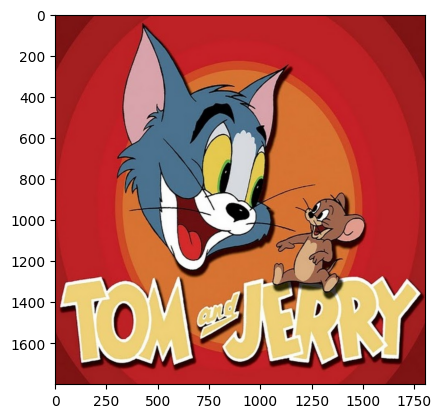

In [12]:
# Call main function
main()